In [1]:
from datetime import date, timedelta
from constants import *
from bars import plot_bars as plot_areas, unique_people_tested
from phe import *
from phe import map_data as phe_map_data, latest_changes
from zoe import latest_map_data as zoe_map_data
from plotting import *
from vaccination import vaccination_dashboard, vaccination_changes
for_date = '*'

In [2]:
latest_changes(s.new_cases_sum, s.new_admissions_sum, s.new_deaths_sum)

Latest for England:
1,819 cases (7 day average) as of Fri 30 Apr, -28.9 since Thu 29 Apr
93 hospitalised (7 day average) as of Sun 02 May, -14.1 since Wed 28 Apr
9 died (7 day average) as of Fri 30 Apr, -0.9 since Thu 29 Apr


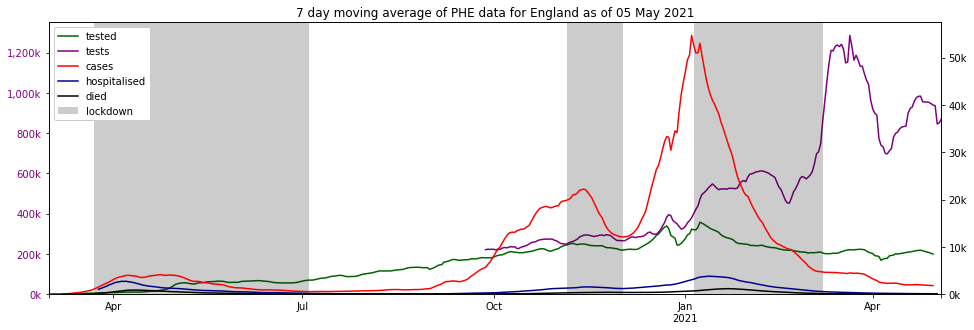

In [3]:
plot_summary(left_series=(s.unique_people_tested_sum, s.new_virus_tests_sum),
             right_series=(s.new_cases_sum, s.new_admissions_sum, s.new_deaths_sum))

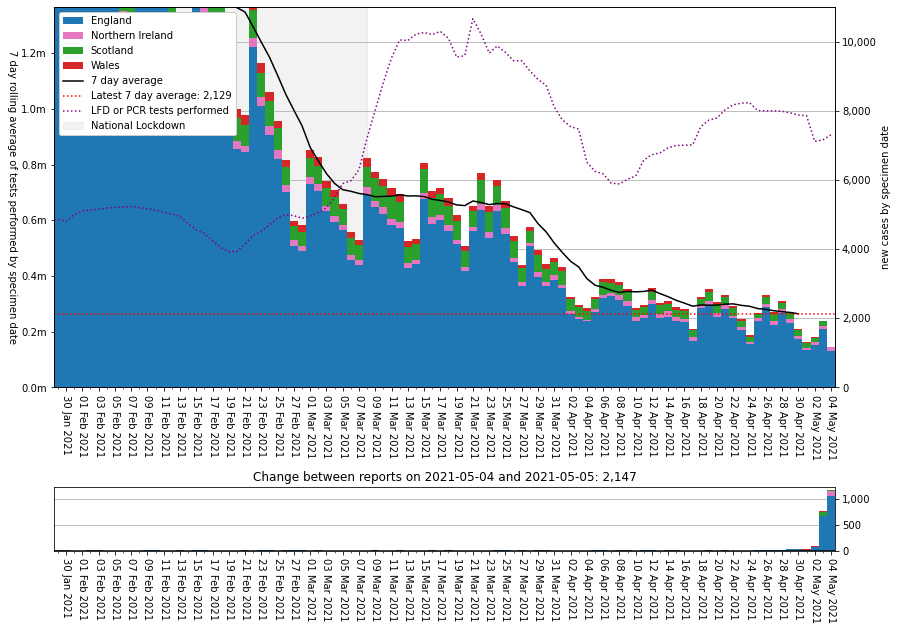

In [4]:
plot_areas(for_date, 'cases_nations', ylim=11_000, earliest='2021-01-29')

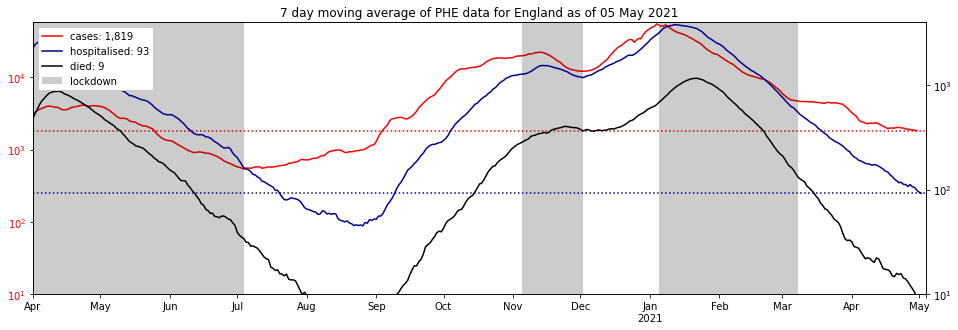

In [20]:
plot_summary(earliest_date='2020-04-01', show_latest='lines', log=True,
             left_series=(s.new_cases_sum,), left_formatter=per1k_formatter,
             right_series=(s.new_admissions_sum, s.new_deaths_sum), right_formatter=per0k_formatter)

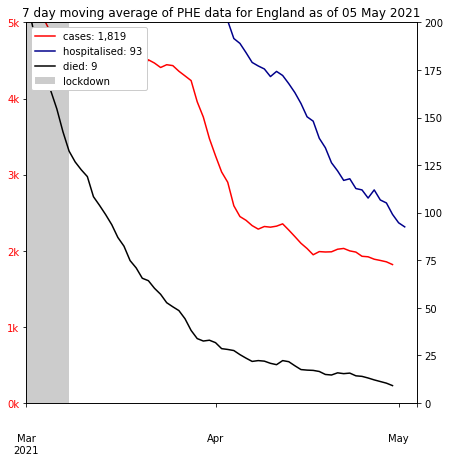

In [6]:
plot_summary(earliest_date='2021-03-01', show_latest=True, figsize=(7, 7),
             left_series=(s.new_cases_sum,), left_formatter=per1k_formatter, left_ymax=5_000,
             right_series=(s.new_admissions_sum, s.new_deaths_sum), right_formatter=per0_formatter, right_ymax=200)

In [7]:
vaccination_changes()

,,Complete (Total),First Dose (Total),Second Dose (Total),Complete (New),First Dose (New),Second Dose (New)
,,,,,,,
England,04 May 21,"+13,284,182","+29,124,310","+13,284,182","+211,639","+99,261","+211,639"
Northern Ireland,04 May 21,"+446,309","+950,778","+446,309","+9,422","+6,084","+9,422"
Scotland,04 May 21,"+1,373,882","+2,846,834","+1,373,882","+25,832","+13,073","+25,832"
Wales,04 May 21,"+783,120","+1,873,152","+783,120","+10,593","+8,752","+10,593"


,areaName,areaCode,full,any,partial,population,full_pct,partial_pct,none_pct
0,England,E92000001,13284182.0,29124310.0,15840128.0,56286961,23.600816,28.141736,48.257448
1,Northern Ireland,N92000002,446309.0,950778.0,504469.0,1893667,23.568505,26.639795,49.791700
2,Scotland,S92000003,1373882.0,2846834.0,1472952.0,5463300,25.147475,26.960848,47.891677
3,Wales,W92000004,783120.0,1873152.0,1090032.0,3152879,24.838251,34.572592,40.589157


'partial: 34,795,074 (52.1%), full: 15,887,493'

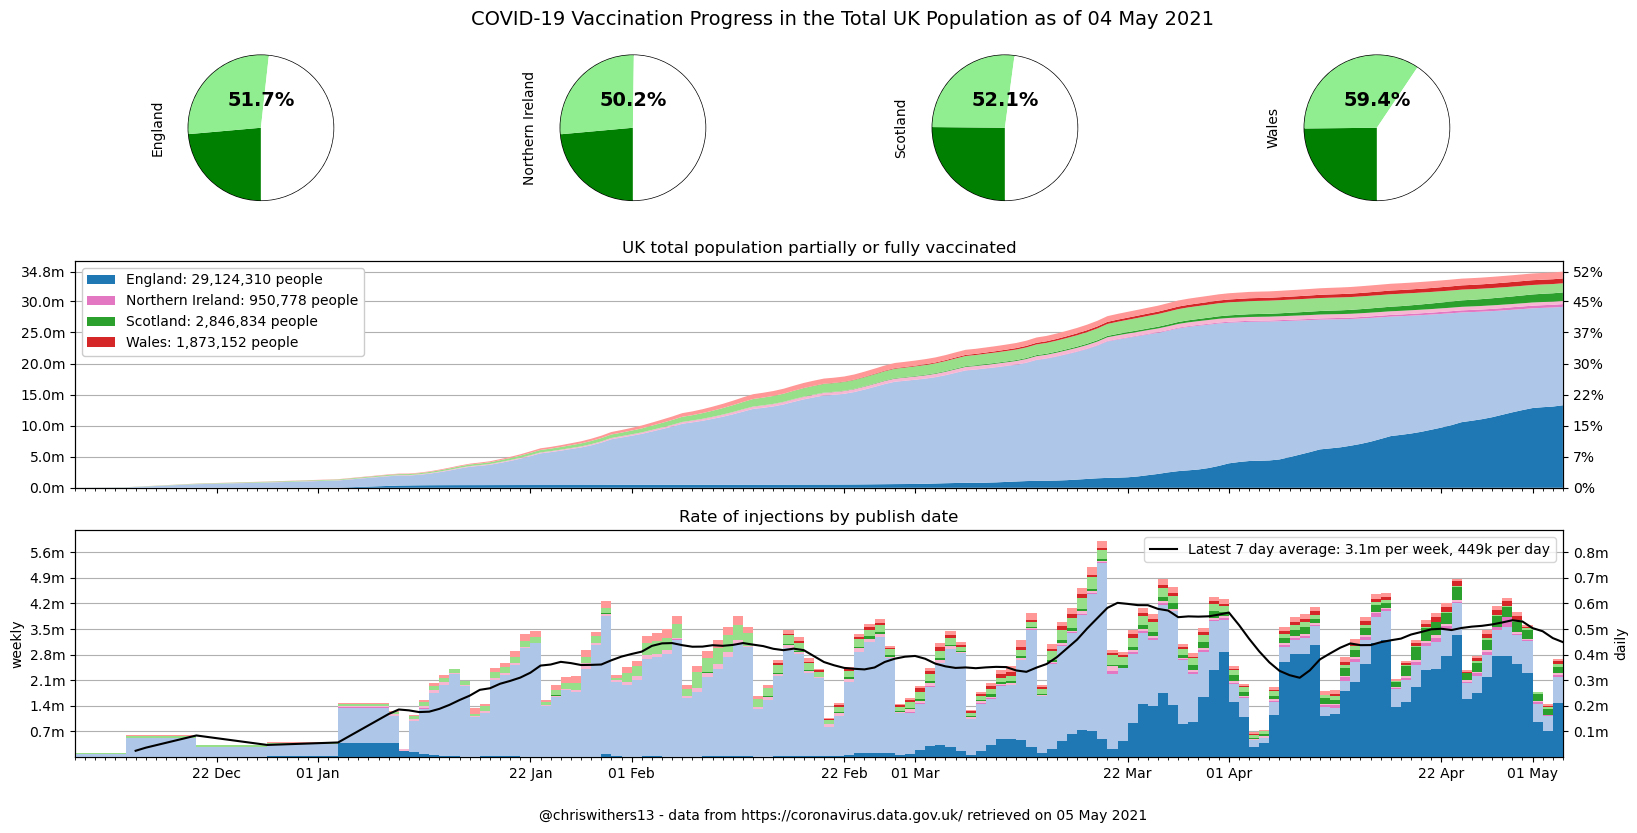

In [8]:
results = vaccination_dashboard(show_partial=True)
partial = results['any'].sum()
population = results['population'].sum()
display(results, f"partial: {partial:,.0f} ({partial/population:.1%}), full: {results['full'].sum():,.0f}")

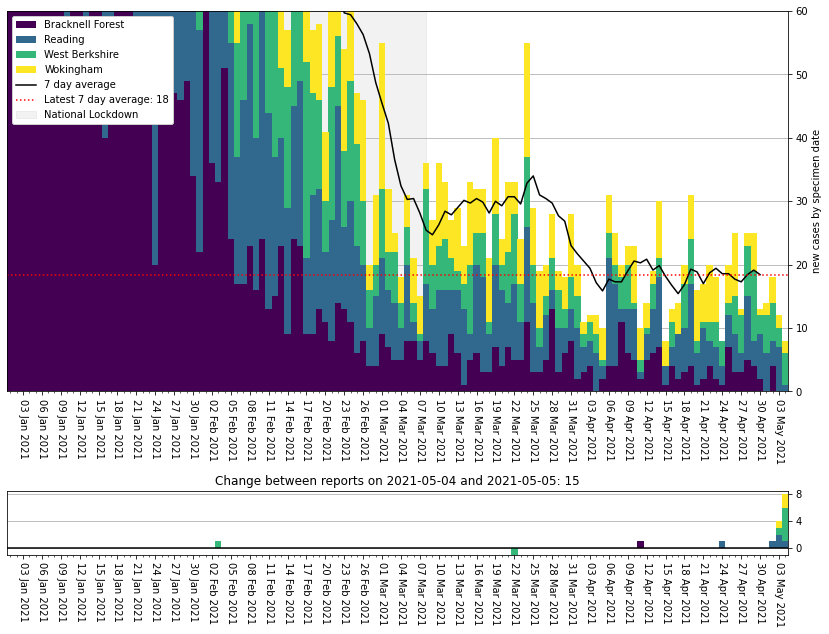

In [9]:
plot_areas(for_date, areas=my_areas, earliest='2021-01-01', ylim=60)

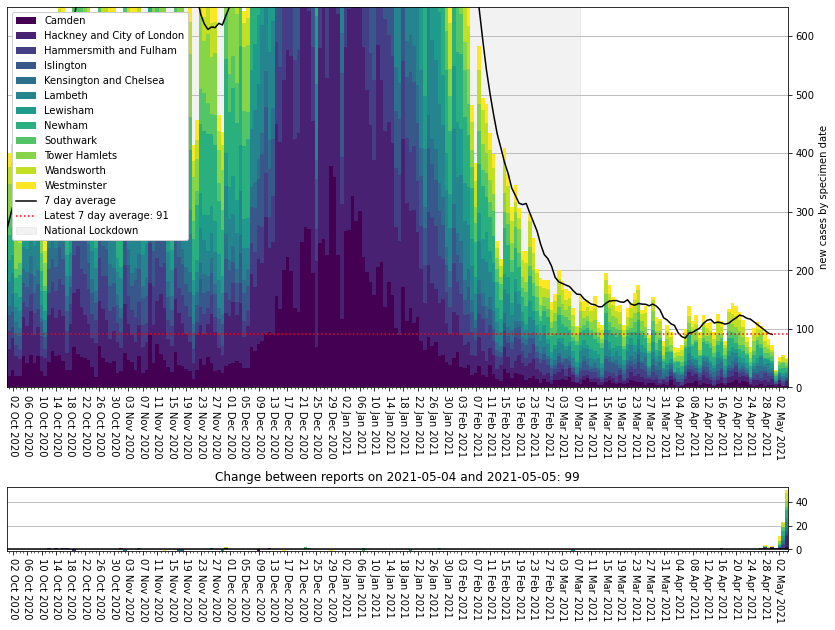

In [10]:
plot_areas(for_date, areas=london_areas, ylim=650)

In [11]:
data = recent_phe_data_summed(for_date)
top_10_cols = [area_name,per100k,new_cases_by_specimen_date, specimen_date]

In [12]:
top_10 = data.sort_values(per100k, ascending=False)[:10][top_10_cols]
top_10

,areaName,"per 100,000 people",newCasesBySpecimenDate,Specimen date
areaCode,,,,
N09000005,Derry City and Strabane,100.473282,152.0,2021-05-04
E07000036,Erewash,97.944891,113.0,2021-05-04
E07000120,Hyndburn,95.011290,77.0,2021-05-04
E08000001,Bolton,85.898105,247.0,2021-05-04
S12000020,Moray,63.661031,61.0,2021-05-04
E08000016,Barnsley,54.280460,134.0,2021-05-04
E06000013,North Lincolnshire,53.397720,92.0,2021-05-04
E06000008,Blackburn with Darwen,52.773621,79.0,2021-05-04
E08000017,Doncaster,50.017634,156.0,2021-05-04


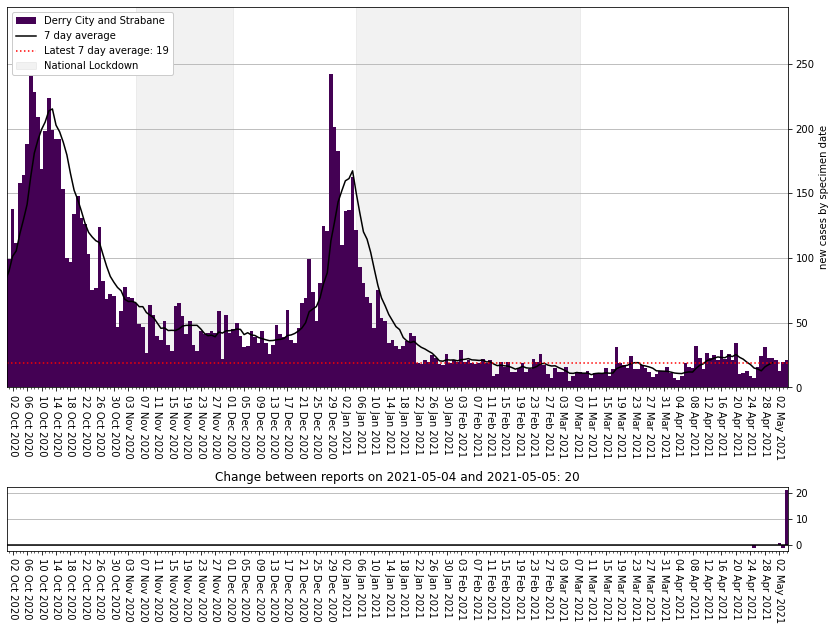

In [13]:
plot_areas(for_date, areas=[top_10.iloc[0].name])

In [14]:
top_10 = data.sort_values(new_cases_by_specimen_date, ascending=False)[:10][top_10_cols]
top_10

,areaName,"per 100,000 people",newCasesBySpecimenDate,Specimen date
areaCode,,,,
E08000035,Leeds,40.093855,318.0,2021-05-04
E08000001,Bolton,85.898105,247.0,2021-05-04
E08000032,Bradford,45.389198,245.0,2021-05-04
E08000019,Sheffield,39.668088,232.0,2021-05-04
E08000034,Kirklees,48.432537,213.0,2021-05-04
E08000036,Wakefield,49.381015,172.0,2021-05-04
E08000025,Birmingham,14.800984,169.0,2021-05-04
E08000003,Manchester,30.387550,168.0,2021-05-04
E08000017,Doncaster,50.017634,156.0,2021-05-04


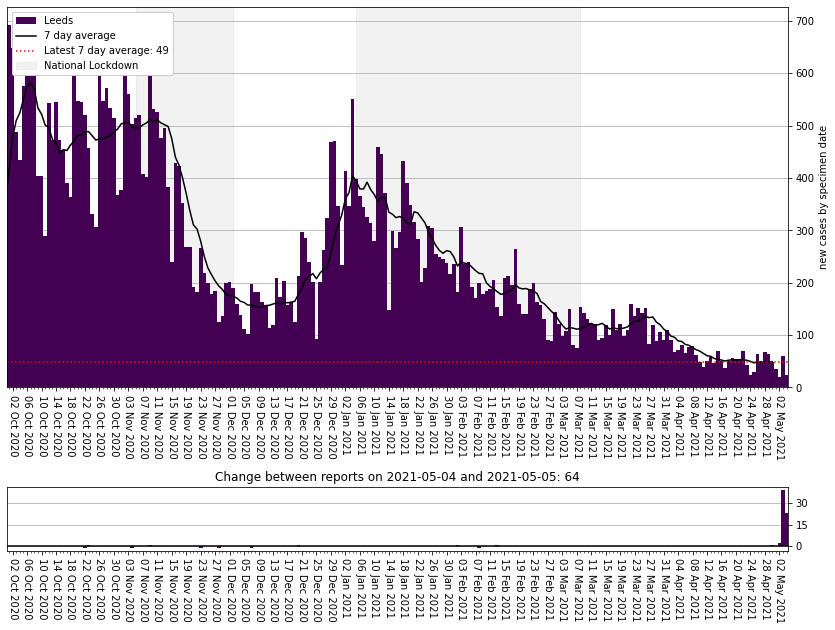

In [15]:
plot_areas(for_date, areas=[top_10.iloc[0].name])

In [16]:
zoe_date, zoe_df = zoe_map_data()
phe_recent_date, phe_recent_geo, phe_recent_title = phe_map_data(for_date)
zoe_max = 1.3
phe_max = 0.15

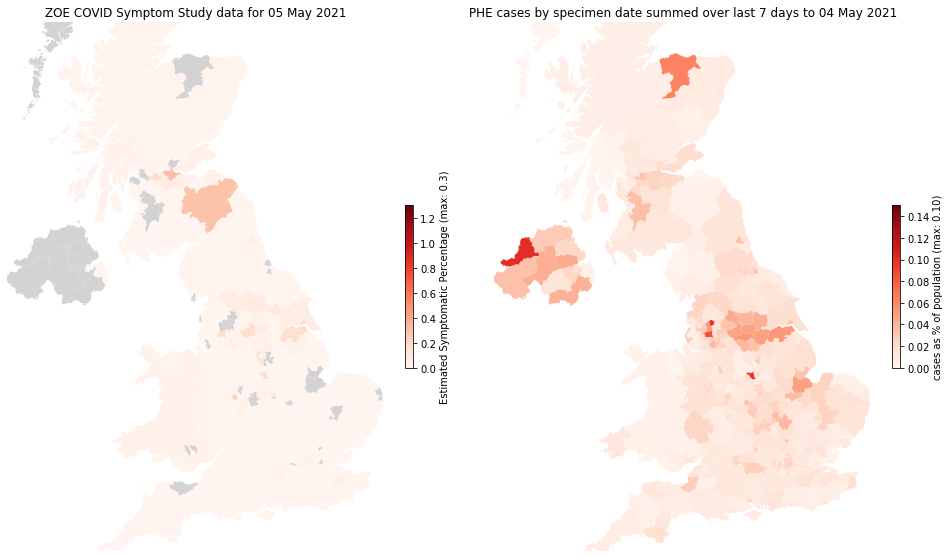

In [17]:
matplotlib_zoe_vs_phe_map(zoe_df, zoe_date, zoe_max, phe_recent_geo, phe_recent_title, phe_max)

In [18]:
bokeh_zoe_vs_phe_map(zoe_df, zoe_date, zoe_max, phe_recent_geo, phe_recent_title, phe_max)

Loading BokehJS ...